# Exercise 1: Reading, displaying and writing images

https://docs.opencv.org/4.5.1/db/deb/tutorial_display_image.html  
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html

In this exercise you will learn how to:
- Read an image from a file using `cv.imread()`
- Display an image in an OpenCV window using `cv.imshow()`
- Display an image with Matplotlib using `plt.imshow()`
- Write an image to a file using `cv.imwrite()`

You will need the following python packages: `pip install numpy matplotlib ipykernel opencv-python`

As a first step, the OpenCV python library `cv2` is imported. We also assign it the name `cv`, which is used to reference the library.

Let's also import `numpy` as `np` and `matplotlib`'s `pyplot` submodule as `plt`.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Reading an image
The function `cv.imread()` is used to read an image, where the first argument is the path to the image, and the second (optional) argument is a flag which specifies the desired format of the image according to the values below:
- `cv.IMREAD_COLOR` (or `1`):  Loads the image in the BGR (Blue, Green, Red) 8-bit format, excluding any alpha channel (default).
- `cv.IMREAD_GRAYSCALE` (or `0`): Loads the image in grayscale mode (i.e. the loaded image will only contain one color channel).
- `cv.IMREAD_UNCHANGED` (or `-1`): Loads the image as is, including the alpha channel, if present.

The function `cv.imread()` returns the image as a numpy ndarray of shape (height, width, color channels):
- height is the number of rows in the ndarray.
- width is the number of columns in the ndarray.
- color channels is a 3-tuple (b,g,r) containing the 3 color channels (blue, green, red), or a 1-tuple for a gray scale image.

Let's read in an image *starry_night.jpg* using the default flag `cv.IMREAD_COLOR`. Notice that:
- The shape of the image (ndarray) is *H x W x C* (Height x Width x Color Channels), where C = 3 (3 color channels: b,g,r).
- The data type contained in the image is `unit8` (unsigned 8-bit integer with a range of 0-255).

In [2]:
# Load the image "starry_night.jpg" using the default flag "cv2.IMREAD_COLOR"
# (i.e. discarding any alpha/transparency channel)
img_color = cv.imread("../data/starry_night.jpg", cv.IMREAD_COLOR)
# Could also use: img_color = cv.imread("data/starry_night.jpg")

if img_color is None:
    print("Could not read the image.")
else:
    print(f"img_color.shape: {img_color.shape}")
    print(f"img_color.dtype: {img_color.dtype}")
    print(f"img_color.min(): {img_color.min()}")
    print(f"img_color.max(): {img_color.max()}\n")

img_color.shape: (600, 752, 3)
img_color.dtype: uint8
img_color.min(): 0
img_color.max(): 255



Notice that an image is simply a 2-dimensional grid (height x width),
with an additional dimension for the color channels.

In [3]:
print(f"Top left pixel's [b,g,r] values:     img_color[0, 0, :] => {img_color[0,0,:]}")
print(f"Bottom right pixel's [b,g,r] values: img_color[-1,-1,:] => {img_color[-1,-1,:]}\n")

print(f"Top left pixel's b (blue) value:     img_color[0, 0, 0] => {img_color[0,0,0]}")
print(f"Top left pixel's g (green) value:    img_color[0, 0, 1] => {img_color[0,0,1]}")
print(f"Top left pixel's r (red) value:      img_color[0, 0, 2] => {img_color[0,0,2]}\n")

print(f"Top left 2x4 pixels' [b,g,r] values: img_color[0:2,0:4,:] =>\n\n{img_color[0:2,0:4,:]}\n")

Top left pixel's [b,g,r] values:     img_color[0, 0, :] => [0 0 0]
Bottom right pixel's [b,g,r] values: img_color[-1,-1,:] => [0 0 0]

Top left pixel's b (blue) value:     img_color[0, 0, 0] => 0
Top left pixel's g (green) value:    img_color[0, 0, 1] => 0
Top left pixel's r (red) value:      img_color[0, 0, 2] => 0

Top left 2x4 pixels' [b,g,r] values: img_color[0:2,0:4,:] =>

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]



Let's load the same image as a gray scale image, i.e. with `cv.IMREAD_GRAYSCALE`.

Notice that the shape is now (height, width) since there is only 1 color channel (representing the 8-bit gray level 0-255).

In [4]:
img_gray = cv.imread("../data/starry_night.jpg", cv.IMREAD_GRAYSCALE)

if img_gray is None:
    print("Could not read the image.")
else:
    print(f"img_gray.shape: {img_gray.shape}")
    print(f"img_gray.dtype: {img_gray.dtype}")
    print(f"img_gray.min(): {img_gray.min()}")
    print(f"img_gray.max(): {img_gray.max()}\n")

print(f"Top left pixel's intensity (gray level) value:      img_gray[0, 0]    => {img_gray[0,0]}")
print(f"Bottom right pixel's intensity (gray level) value:  img_gray[-1,-1]   => {img_gray[-1,-1]}\n")
print(f"Top left 2x4 pixels' intensity (gray level) values: img_gray[0:2,0:4] =>\n\n{img_gray[0:2,0:4]}\n")

img_gray.shape: (600, 752)
img_gray.dtype: uint8
img_gray.min(): 0
img_gray.max(): 255

Top left pixel's intensity (gray level) value:      img_gray[0, 0]    => 0
Bottom right pixel's intensity (gray level) value:  img_gray[-1,-1]   => 0

Top left 2x4 pixels' intensity (gray level) values: img_gray[0:2,0:4] =>

[[0 0 0 0]
 [0 0 0 0]]



## Displaying an image

### Creating a window and displaying an image in it
The function `cv.imshow()` is used to display an image in a window (where the window size automatically fits to the image size):
- The first argument is a unique window name (i.e. a string).
- The second argument is the image to display in the window.

You can create as many windows as you like, but with different window names.

If you want to create a window and load an image in to it later, you can use the function `cv.namedWindow()`:
- The first argument is a unique window name (i.e. a string).
- The second argument is a flag specifying if the window is resizable or not.
  - `cv.WINDOW_AUTOSIZE` creates a window that will automatically resize itself to fit the image displayed in it (default).
  - `cv.WINDOW_NORMAL` creates a window that can be manually resized by the user (good for very large images).

Once a window has been created with `cv.namedWindow()`, an image is displayed in it with the `cv.imshow()` function (using the same window name).

### Waiting for keyboard input

When displaying an image in a window, it's useful to respond to keybaord event, e.g. to close the window. The function `cv.waitKey()` takes an integer as an input argument, specifying the number of milliseconds to wait for a keyboard key to be pressed:
- When the specified time has elapsed, the function stops waiting, and program execution is continued. 
- If an argument (time) of 0 is passed in as an argument, the function waits indefinitely for a key stroke.

As soon as a key is pressed, the program continues. The function also returns the ASCII code for the key that was pressed, which can be used to detect specific key strokes.

### Destroying windows

We need to destroy the windows we create when we no longer need them.
- The function `cv.destroyAllWindows()` destroys all the windows we have created.
- The function `cv.destroyWindow()` only destroys a specific window, i.e. the window with the name passed in as an argument.

**NOTE! OpenCV will create a number of windows when you run this cell. The windows might be minimized in your tray. You need to select one of these windows and press a key on your keyboard to close the windows (keep pressing a key until all windows have closed, otherwise the cell won't finish executing).**

In [5]:
# Display the color image in two different windows
cv.imshow("Display window 1", img_color) # a new window pops up here
cv.imshow("Display window 2", img_color) # a new window pops up here

# Create a auto resizable window, then show the gray scale image in it
cv.namedWindow("Display window 3", cv.WINDOW_AUTOSIZE) # a new window pops up here
cv.imshow("Display window 3", img_gray)

# Wait indefinitely for any keyboard key to be pressed 
k = cv.waitKey(0) & 0xFF

# Was the key 'q' pressed or not?
if k == ord("q"):
    print("'q' was pressed")
else:
    print("'q' was not pressed")

# Destroy the window with the window name "Display window 3"
# (i.e. destroy the window showing the gray scale image)
cv.destroyWindow("Display window 3")

# Wait for any keyboard key to be pressed, but continue after 1000 miliseconds
cv.waitKey(1000) & 0xFF

# Destroy all windows
cv.destroyAllWindows()

'q' was not pressed


## Writing (saving) an image

The function `cv.imwrite()` writes an image to the file system:
- The first argument is the file name.
- The second argument is the image you want to save.

In [6]:
# Save the color- and gray scale images to the file system
cv.imwrite("../data/starry_night_color.png", img_color)
cv.imwrite("../data/starry_night_gray.png", img_gray)

True

## Displaying images with Matplotlib

Matplotlib is a plotting library for Python which gives you wide variety of plotting functions. The function `plt.imshow()` can be used to plot an image.

**Note**: Most libraries that deal with images and video (e.g. matplotlib, scikit-image, pillow) expect the color channels to be in the order Red, Green and Blue (r,g,b), whereas OpenCV expects the color channels to be in the order Blue, Green and Red (b,g,r). Therefore, we need to reverse the order of the color channels when mixing OpenCV code with function from other libraries.

We can reverse the 3 color channels using OpenCV functions, or numpy slicing:
- `img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)`
- `b,g,r = cv.split(img_bgr)` followed by `img_rgb = cv.merge([r,g,b])`
- `img_rgb = img_bgr[:,:,::-1]`

**Note**: `cv.cvtColor()` can be used with various different flags to convert between BGR <=> RBG and gray scale, e.g.:
- img_gray = `cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)`
- img_gray = `cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)`
- img_bgr = `cv.cvtColor(img_rgb, cv.COLOR_RGB2BGR)`
- img_rgb = `cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)`

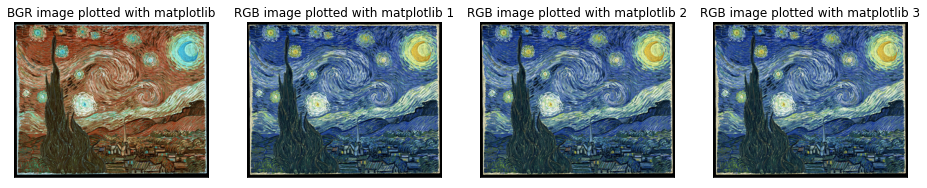

In [7]:
fig = plt.figure(figsize=(16,16))

# Let's plot the color image we loaded with cv.imread() using matplotlib's imshow() function
plt.subplot(1,4,1); plt.imshow(img_color);
plt.title('BGR image plotted with matplotlib')
plt.xticks([]); plt.yticks([]);  # to hide tick values on X and Y axis

# Now, let's reverse the color channels from (b,g,r) to (r,g,b) and plot the image with matplotlib again
img_color_reversed = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
plt.subplot(1,4,2); plt.imshow(img_color_reversed);
plt.title('RGB image plotted with matplotlib 1')
plt.xticks([]); plt.yticks([]);  # to hide tick values on X and Y axis

# Now, let's reverse the color channels from (b,g,r) to (r,g,b) and plot the image with matplotlib again
img_color_reversed2 = img_color[:,:,::-1]
plt.subplot(1,4,3); plt.imshow(img_color_reversed2);
plt.title('RGB image plotted with matplotlib 2')
plt.xticks([]); plt.yticks([]);  # to hide tick values on X and Y axis

# Finally, let's reverse the color channels from (b,g,r) to (r,g,b) with cv.split() and cv.merge() and plot once more
b,g,r = cv.split(img_color)
img_color_reversed3 = cv.merge([r,g,b])
plt.subplot(1,4,4); plt.imshow(img_color_reversed3);
plt.title('RGB image plotted with matplotlib 3')
plt.xticks([]); plt.yticks([]);  # to hide tick values on X and Y axis

plt.show()

**Note**: Matplotlib expects 3 color channels even for gray scale images (with the same value for each channel), whereas OpenCV's `cv.imread()` with `cv.IMREAD_GRAYSCALE` only uses 1 color channel.

We can display gray scale images correctly with Matplotlib in two ways:
- By using `plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')`.
- By creating an image with 3 color channels and copying the same gray scale values into each color channel.

img_gray_3channel.shape: (600, 752, 3)


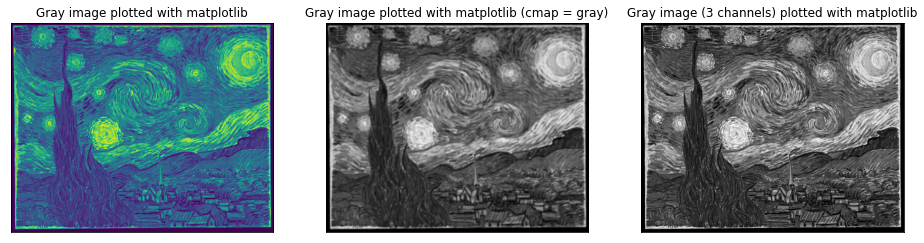

In [8]:
fig = plt.figure(figsize=(16,16))

# Let's plot OpenCV's gray scale image with matplotlib
plt.subplot(1,3,1); plt.imshow(img_gray);
plt.title('Gray image plotted with matplotlib')
plt.xticks([]); plt.yticks([]);  # to hide tick values on X and Y axis

# Let's plot the gray scale image with matplotlib using cmap = gray
plt.subplot(1,3,2); plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic');
plt.title('Gray image plotted with matplotlib (cmap = gray)')
plt.xticks([]); plt.yticks([]);  # to hide tick values on X and Y axis

# Let's create a 3-channel gray scale image and plot it as normal with matplotlib
img_gray_3channel = np.stack((img_gray,)*3, axis=-1)
print(f'img_gray_3channel.shape: {img_gray_3channel.shape}')
plt.subplot(1,3,3); plt.imshow(img_gray_3channel);
plt.title('Gray image (3 channels) plotted with matplotlib')
plt.xticks([]); plt.yticks([]);  # to hide tick values on X and Y axis

plt.show()